In [1]:
import pandas as pd
import matplotlib.pyplot as plt

buy_stat = pd.read_pickle('../signal_stat/buy_stat.pkl')
sell_stat = pd.read_pickle('../signal_stat/sell_stat.pkl')

([<matplotlib.lines.Line2D at 0x7f901aafa200>], 41)

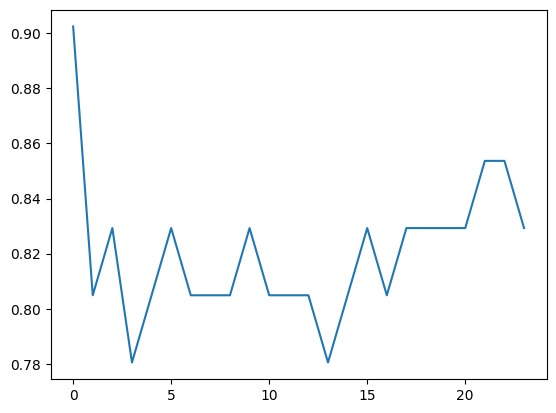

In [2]:
stat = list()
for i in range(1, 25):
    a, b = buy_stat[(buy_stat['pattern'] == "[('STOCH', (15, 85)), ('RSI', (25, 75)), ('LinearReg', ())]") & 
                    (buy_stat[f'price_diff_{i}'] > 0)].shape[0]/buy_stat[(buy_stat['pattern'] == "[('STOCH', (15, 85)), ('RSI', (25, 75)), ('LinearReg', ())]")].shape[0], buy_stat[(buy_stat['pattern'] == "[('STOCH', (15, 85)), ('RSI', (25, 75)), ('LinearReg', ())]")].shape[0]
    stat.append(a)
plt.plot(stat), buy_stat[(buy_stat['pattern'] == "[('STOCH', (15, 85)), ('RSI', (25, 75)), ('LinearReg', ())]")].shape[0]

([<matplotlib.lines.Line2D at 0x7f90127d4760>], 20)

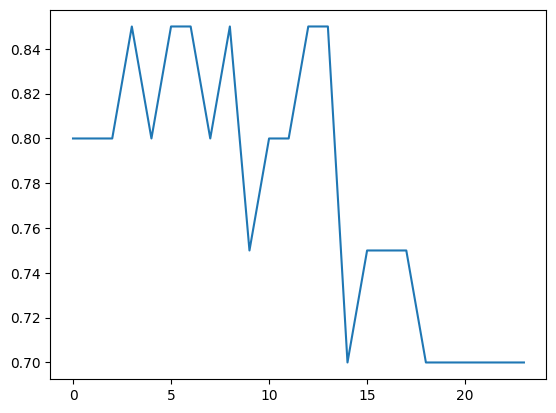

In [3]:
stat = list()
for i in range(1, 25):
    a = sell_stat[(sell_stat['pattern'] == "[('STOCH', (15, 85)), ('RSI', (25, 75)), ('LinearReg', ())]") & 
                  (sell_stat[f'price_diff_{i}'] < 0)].shape[0]/sell_stat[(sell_stat['pattern'] == "[('STOCH', (15, 85)), ('RSI', (25, 75)), ('LinearReg', ())]")].shape[0]
    stat.append(a)
plt.plot(stat), sell_stat[(sell_stat['pattern'] == "[('STOCH', (15, 85)), ('RSI', (25, 75)), ('LinearReg', ())]")].shape[0]

([<matplotlib.lines.Line2D at 0x7f9012858640>], 625)

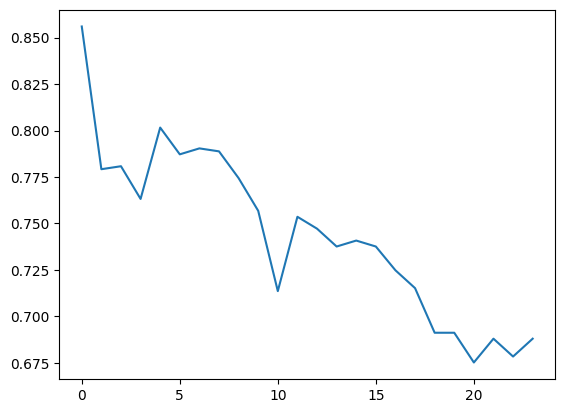

In [4]:
stat = list()
for i in range(1, 25):
    a = buy_stat[(buy_stat['pattern'] == "[('STOCH', (15, 85)), ('RSI', (25, 75))]") & 
                 (buy_stat[f'price_diff_{i}'] > 0)].shape[0]/buy_stat[(buy_stat['pattern'] == "[('STOCH', (15, 85)), ('RSI', (25, 75))]")].shape[0]
    stat.append(a)
plt.plot(stat), buy_stat[(buy_stat['pattern'] == "[('STOCH', (15, 85)), ('RSI', (25, 75))]")].shape[0]

([<matplotlib.lines.Line2D at 0x7f901289bd90>], 190)

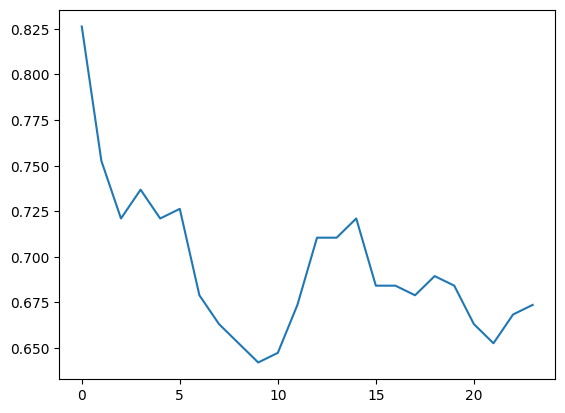

In [5]:
stat = list()
for i in range(1, 25):
    a = sell_stat[(sell_stat['pattern'] == "[('STOCH', (15, 85)), ('RSI', (25, 75))]") & 
                  (sell_stat[f'price_diff_{i}'] < 0)].shape[0]/sell_stat[(sell_stat['pattern'] == "[('STOCH', (15, 85)), ('RSI', (25, 75))]")].shape[0]
    stat.append(a)
plt.plot(stat), sell_stat[(sell_stat['pattern'] == "[('STOCH', (15, 85)), ('RSI', (25, 75))]")].shape[0]

([<matplotlib.lines.Line2D at 0x7f9012703370>], 137)

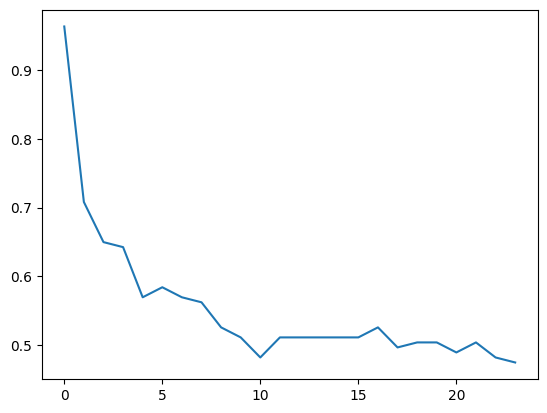

In [6]:
stat = list()
for i in range(1, 25):
    a = buy_stat[(buy_stat['pattern'] == "['PriceChange', ('LinearReg', ())]") & 
                 (buy_stat[f'price_diff_{i}'] > 0)].shape[0]/buy_stat[(buy_stat['pattern'] == "['PriceChange', ('LinearReg', ())]")].shape[0]
    stat.append(a)
plt.plot(stat), buy_stat[(buy_stat['pattern'] == "['PriceChange', ('LinearReg', ())]")].shape[0]

([<matplotlib.lines.Line2D at 0x7f901276d840>], 223)

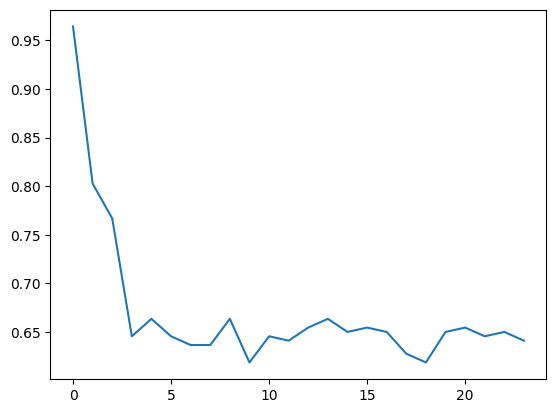

In [7]:
stat = list()
for i in range(1, 25):
    a = sell_stat[(sell_stat['pattern'] == "['PriceChange', ('LinearReg', ())]") & 
                  (sell_stat[f'price_diff_{i}'] < 0)].shape[0]/sell_stat[(sell_stat['pattern'] == "['PriceChange', ('LinearReg', ())]")].shape[0]
    stat.append(a)
plt.plot(stat), sell_stat[(sell_stat['pattern'] == "['PriceChange', ('LinearReg', ())]")].shape[0]

([<matplotlib.lines.Line2D at 0x7f90125dc8e0>], 801)

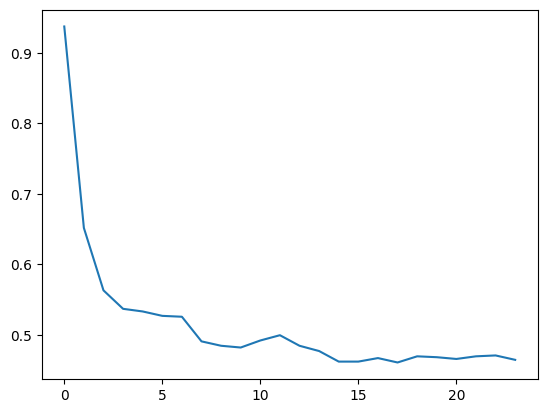

In [8]:
stat = list()
for i in range(1, 25):
    a = buy_stat[(buy_stat['pattern'] == "['PriceChange']") & 
                 (buy_stat[f'price_diff_{i}'] > 0)].shape[0]/buy_stat[(buy_stat['pattern'] == "['PriceChange']")].shape[0]
    stat.append(a)
plt.plot(stat), buy_stat[(buy_stat['pattern'] == "['PriceChange']")].shape[0]

([<matplotlib.lines.Line2D at 0x7f9012622da0>], 1027)

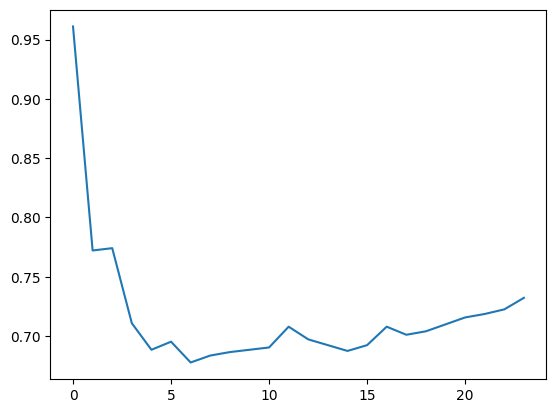

In [9]:
stat = list()
for i in range(1, 25):
    a = sell_stat[(sell_stat['pattern'] == "['PriceChange']") & 
                  (sell_stat[f'price_diff_{i}'] < 0)].shape[0]/sell_stat[(sell_stat['pattern'] == "['PriceChange']")].shape[0]
    stat.append(a)
plt.plot(stat), sell_stat[(sell_stat['pattern'] == "['PriceChange']")].shape[0]

# Create test dataframe

In [10]:
import sys
sys.path.insert(0,'..')

import numpy as np
import pandas as pd
from datetime import datetime
from os import environ
from data.get_data import GetData
from data.get_data import DataFactory
from config.config import ConfigFactory
from signals.find_signal import FindSignal
from signal_stat.signal_stat import SignalStat
from indicators.indicators import IndicatorFactory
from signals.find_signal import SignalFactory

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import mplfinance as mpf

plt.style.use('ggplot')

pd.set_option('display.max_rows', 500)

debug = False
# Set environment variable
environ["ENV"] = "test"
# Set dataframe dict
dfs = {'stat': {'buy': pd.DataFrame(columns=['time', 'ticker', 'timeframe']),
                'sell': pd.DataFrame(columns=['time', 'ticker', 'timeframe'])}}

# Get configs
configs = ConfigFactory.factory(environ).configs
       
# Set list of available exchanges, cryptocurrencies and tickers
exchanges = {'Binance': {'API': GetData(**configs), 'tickers': ['CRVUSDT']}}

# Get dict of exchange APIs
exchange_apis = dict()
for exchange in exchanges:
    exchange_api = DataFactory.factory(exchange, **configs)
    tickers = exchanges[exchange]['tickers']
    exchange_api.fill_ticker_dict(tickers)
    exchanges[exchange]['API'] = exchange_api

    # Higher timeframe from which we take levels
work_timeframe = configs['Timeframes']['work_timeframe']
    
# For every exchange, ticker and timeframe in base get cryptocurrency data and write it to correspond dataframe
for exchange, exchange_data in exchanges.items():
    exchange_api = exchange_data['API']
    tickers = exchange_data['tickers']
    timeframes = ['1h', '5m']
    for ticker in tickers:
        for timeframe in timeframes:
            print(f'Exchange is {exchange}, ticker is {ticker}, timeframe is {timeframe}')
            if debug:
                df = pd.read_pickle(f'test_{ticker}_{timeframe}.pkl')
                new_data_flag = True
            else:
                # If cryptocurrency dataframe is in dataframe dict - get it, else - create the new one
                df = dfs.get(ticker, dict()).get(timeframe, dict()).get('data', pd.DataFrame())
                # Write data to the dataframe
                df, data_qty = exchange_api.get_data(df, ticker, timeframe)
            # Create indicator list from search signal patterns list, if has new data and
            # data not from higher timeframe, else get only levels
            if data_qty > 1:
                indicators = list()
                if timeframe == work_timeframe:
                    indicator_list = configs['Indicator_list']
                else:
                    indicator_list = ['SUP_RES', 'LinearReg']
                for indicator in indicator_list:
                    ind_factory = IndicatorFactory.factory(indicator, configs)
                    if ind_factory:
                        indicators.append(ind_factory)
                # Write indicators to dataframe, update dataframe dict
                dfs, df = exchange_api.add_indicator_data(dfs, df, indicators, ticker, timeframe, data_qty, configs)
                # Get signals
                if timeframe == work_timeframe:
                    fs = FindSignal(configs)
                    levels = dfs[ticker][timeframe]['levels']
                    points = fs.find_signal(dfs, ticker, timeframe, data_qty)

Exchange is Binance, ticker is CRVUSDT, timeframe is 1h
Exchange is Binance, ticker is CRVUSDT, timeframe is 5m


# Test create_plot method of Vizualizer class

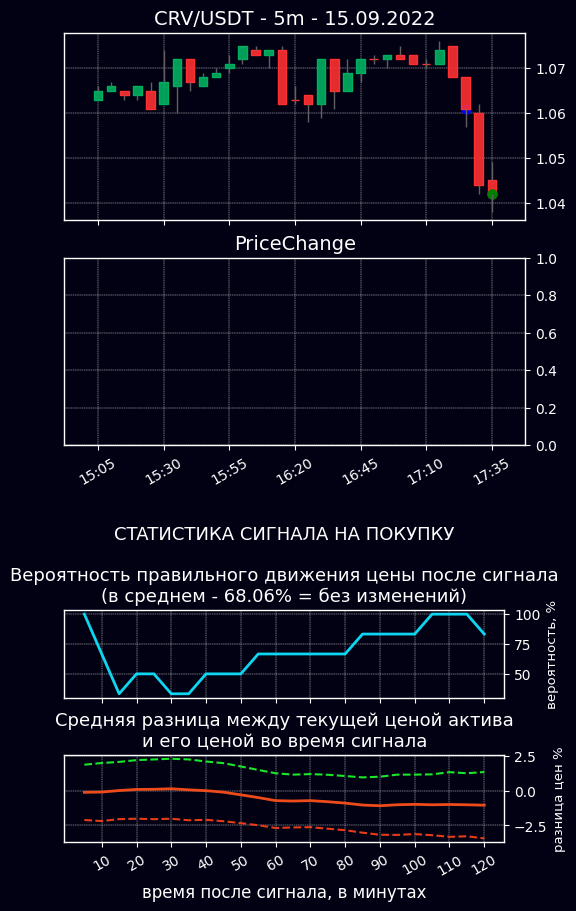

In [11]:
class Visualizer:
    type = 'Visualizer'
    ticker_color = 'white'
    border_color = 'white'
    background_color = '#010113'
    stat_color_1 = '#0ED6F1'
    stat_std_color_1 = '#19E729'
    stat_std_color_2 = '#E73B19'
    stat_color_2 = '#EE4B1A'

    def __init__(self, **params):
        self.params = params[self.type]['params']
        # Path to save plot files
        self.image_path = self.params['image_path']
        self.indicator_params = params['Indicator_signal']
        self.plot_width = self.params.get('plot_width', 10)
        self.indicator_dict = self.params.get('indicator_dict', dict())
        self.level_indicators = self.params.get('level_indicators', list())
        self.boundary_indicators = self.params.get('boundary_indicators', list())
        # Max number of previous candles for which signal can be searched for
        self.max_prev_candle_limit = self.params.get('max_prev_candle_limit', 0)
        # dict for storing previous statistics values
        self.prev_stat_dict = dict()

    def plot_indicator_parameters(self, point_type: str, index: int, indicator: str,
                                  axs: plt.axis, indicator_params: list) -> None:
        """ Plot parameters of indicator (like low or high boundary, etc.)"""
        indicator_param = indicator_params[index]
        if indicator_param:
            if indicator in self.boundary_indicators:
                if point_type == 'buy':
                    axs[index + 1].axhline(y=indicator_param[0], color='g', linestyle='--', linewidth=1.5)
                else:
                    axs[index + 1].axhline(y=indicator_param[1], color='r', linestyle='--', linewidth=1.5)

    def plot_point(self, point_type: str, data: pd.DataFrame, ax: plt.axis, index=0) -> None:
        """ Plot trade point """
        if index > 0:
            color = 'blue'
        elif point_type == 'buy':
            color = 'green'
        else:
            color = 'red'
        if point_type == 'buy':
            ax.scatter(self.plot_width-index, data['close'].iloc[-1-index], s=50, color=color)
        else:
            ax.scatter(self.plot_width-index, data['close'].iloc[-1-index], s=50, color=color)

    @staticmethod
    def plot_levels(data: pd.DataFrame, levels: list, axs: plt.axis) -> None:
        """ Plot support and resistance levels"""
        for level in levels:
            if data['low'].min() <= level[0] <= data['high'].max():  # and level[1] == 3:
                axs[0].axhline(y=level[0], color='b', linestyle='dotted', linewidth=1.5)

    def save_plot(self, ticker, timeframe, pattern, data):
        filename = f"{self.image_path}/{ticker}_{timeframe}_{pattern}_{data['time'].iloc[-1]}.png"
        plt.savefig(filename, bbox_inches='tight')
        return filename

    @staticmethod
    def process_ticker(ticker: str) -> str:
        """ Bring ticker to more convenient view """
        if '-' in ticker:
            return ticker
        if '/' in ticker:
            ticker = ticker.replace('/', '-')
            return ticker
        ticker = ticker[:-4] + '/' + ticker[-4:]
        return ticker

    @staticmethod
    def statistics_change(prev_mean_right_prognosis, mean_right_prognosis):
        """ Measure statistics difference between previous signal and current signal """
        stat_diff = round(mean_right_prognosis - prev_mean_right_prognosis, 2)
        if stat_diff < 0:
            return f'= уменьшилась на {abs(stat_diff)}%'
        if stat_diff > 0:
            return f'= выросла на {stat_diff}%'
        return '= без изменений'

    def create_plot(self, dfs, point, levels):
        # get necessary info
        ticker, timeframe, point_index, point_type, time, pattern, plot_path, exchange_list, statistics, y = point
        df = dfs[ticker][timeframe]['data']
        data = df.loc[point_index - self.plot_width:point_index]
        ohlc = data[['time', 'open', 'high', 'low', 'close', 'volume']]
        # get indicator list
        indicator_list = [p[0] for p in pattern if p[0] not in self.level_indicators]
        indicator_params = [p[1] for p in pattern if p not in self.level_indicators]
        plot_num = len(indicator_list) + 1

        # Plot signal
        # make subfigs
        fig = plt.figure(constrained_layout=True, figsize=(1.7 * (plot_num + 1), 3 * (plot_num + 1)))
        fig.patch.set_facecolor(self.background_color)
        subfigs = fig.subfigures(2, 1, wspace=0, height_ratios=[3, 2.5])

        # make subplots
        axs1 = subfigs[0].subplots(plot_num, 1, sharex=True)
        subfigs[0].patch.set_facecolor(self.background_color)
        subfigs[1].patch.set_facecolor(self.background_color)
        ap = list()

        # plot candles
        ohlc = ohlc.set_index('time')

        for index, indicator in enumerate(indicator_list):
            if indicator == 'PriceChange':
                self.plot_point(point_type, data, axs1[0], indicator_params[index])
            # plot indicator
            indicator_columns = self.indicator_dict[indicator]
            for i_c in indicator_columns:
                m = mpf.make_addplot(data[i_c], panel=index + 1, title=indicator, ax=axs1[index + 1], width=2)
                ap.append(m)
            # plot indicator parameters
            self.plot_indicator_parameters(point_type, index, indicator, axs1, indicator_params)
            # plot y-labels from right side
            axs1[index + 1].yaxis.set_label_position("right")
            axs1[index + 1].yaxis.tick_right()
            # plot grid
            axs1[index + 1].grid(which='both', linestyle='--', linewidth=0.3)
            # set title
            axs1[index + 1].set_title(indicator, fontsize=14, color=self.ticker_color)
            # set ticker color
            axs1[index + 1].tick_params(axis='x', colors=self.ticker_color)
            axs1[index + 1].tick_params(axis='y', colors=self.ticker_color)
            # set background color
            axs1[index + 1].patch.set_facecolor(self.background_color)
            # set border color
            axs1[index + 1].spines['bottom'].set_color(self.border_color)
            axs1[index + 1].spines['top'].set_color(self.border_color)
            axs1[index + 1].spines['right'].set_color(self.border_color)
            axs1[index + 1].spines['left'].set_color(self.border_color)

        # plot candles
        axs1[0].grid(which='both', linestyle='--', linewidth=0.3)
        # set ticker color
        axs1[0].tick_params(axis='x', colors=self.ticker_color)
        axs1[0].tick_params(axis='y', colors=self.ticker_color)
        # set background color
        axs1[0].patch.set_facecolor(self.background_color)
        # set border color
        axs1[0].spines['bottom'].set_color(self.border_color)
        axs1[0].spines['top'].set_color(self.border_color)
        axs1[0].spines['right'].set_color(self.border_color)
        axs1[0].spines['left'].set_color(self.border_color)

        # set x-labels
        # axs1[-1].set_xlabel(f"\n{data['time'].iloc[-1].date()}\n", fontsize=14)
        plt.xticks(rotation=30)

        # plot all subplots
        mpf.plot(ohlc, type='candle', ax=axs1[0], addplot=ap, warn_too_much_data=1001, style='yahoo',
                 ylabel='', returnfig=True)

        # set titles
        axs1[0].set_title(f'{self.process_ticker(ticker)} - {timeframe} - '
                          f'{data["time"].iloc[-1].date().strftime("%d.%m.%Y")}', fontsize=14, color=self.ticker_color)
        for index, indicator in enumerate(indicator_list):
            axs1[index + 1].set_title(indicator, fontsize=14, color=self.ticker_color)

        # plot point of trade
        self.plot_point(point_type, data, axs1[0])

        # plot levels
        # self.plot_levels(data, levels, axs1)

        # Plot signal statistics
        pct_right_prognosis = [s[0] for s in statistics[0]]
        pct_price_diff_mean = [s[1] for s in statistics[0]]
        pct_price_diff_std = [s[2] for s in statistics[0]]
        pct_price_diff_mean_plus_std = [a + b for a, b in zip(pct_price_diff_mean, pct_price_diff_std)]
        pct_price_diff_mean_minus_std = [a - b for a, b in zip(pct_price_diff_mean, pct_price_diff_std)]

        # get previous percent of right prognosis and save current percent to statistics dictionary
        mean_right_prognosis = round(sum(pct_right_prognosis)/len(pct_right_prognosis), 2)
        if str(pattern[0][0]).startswith('PriceChange'):
            key = str(pattern[0][0])
        else:
            key = str(pattern)
        # check if pattern and trade type are in statistics dictionary
        if key in self.prev_stat_dict and self.prev_stat_dict[key] and point_type in self.prev_stat_dict[key]:
            prev_mean_right_prognosis = self.prev_stat_dict[key][point_type]
        else:
            prev_mean_right_prognosis = mean_right_prognosis
            self.prev_stat_dict[key] = dict()

        self.prev_stat_dict[key][point_type] = mean_right_prognosis

        # get change of statistics
        stat_change = self.statistics_change(prev_mean_right_prognosis, mean_right_prognosis)

        # make subplots
        axs2 = subfigs[1].subplots(2, 1, sharex=True)

        # make plots
        axs2[0].plot(pct_right_prognosis, linewidth=2, color=self.stat_color_1)
        axs2[0].yaxis.set_label_position("right")
        axs2[0].yaxis.tick_right()
        axs2[1].plot(pct_price_diff_mean_plus_std, linewidth=1.5, linestyle='--', color=self.stat_std_color_1)
        axs2[1].plot(pct_price_diff_mean_minus_std, linewidth=1.5, linestyle='--', color=self.stat_std_color_2)
        axs2[1].plot(pct_price_diff_mean, linewidth=2, color=self.stat_color_2)
        axs2[1].yaxis.set_label_position("right")
        axs2[1].yaxis.tick_right()
        # plot grid
        axs2[0].grid(which='both', linestyle='--', linewidth=0.3)
        axs2[1].grid(which='both', linestyle='--', linewidth=0.3)

        # set title
        if point_type == 'buy':
            title = '\nСTATИСТИКА СИГНАЛА НА ПОКУПКУ'
        else:
            title = '\nСTATИСТИКА СИГНАЛА НА ПРОДАЖУ'
        axs2[0].set_title(f'{title}\n\nВероятность правильного движения цены после сигнала\n'
                          f'(в среднем - {mean_right_prognosis}% {stat_change})',
                          fontsize=13, color=self.ticker_color)
        axs2[1].set_title('Средняя разница между текущей ценой актива\nи его ценой во время сигнала', fontsize=13,
                          color=self.ticker_color)

        # set x-ticks
        xticklabels = ['10', '20', '30', '40', '50', '60', '70', '80', '90', '100', '110', '120']
        # set ticker color
        axs2[0].tick_params(axis='x', colors=self.ticker_color)
        axs2[0].tick_params(axis='y', colors=self.ticker_color)
        # set background color
        axs2[0].patch.set_facecolor(self.background_color)
        # set border color
        axs2[0].spines['bottom'].set_color(self.border_color)
        axs2[0].spines['top'].set_color(self.border_color)
        axs2[0].spines['right'].set_color(self.border_color)
        axs2[0].spines['left'].set_color(self.border_color)

        axs2[1].set_xticks(np.arange(1, 25, 2))
        axs2[1].set_xticklabels(xticklabels)
        plt.xticks(rotation=30)

        # set x-labels
        axs2[1].set_xlabel(f"время после сигнала, в минутах", fontsize=12, color=self.ticker_color)

        # set y-labels
        axs2[0].set_ylabel("вероятность, %", fontsize=9.5, color=self.ticker_color)
        axs2[1].set_ylabel("разница цен %", fontsize=9.5, color=self.ticker_color)

        # set ticker color
        axs2[1].tick_params(axis='x', colors=self.ticker_color)
        axs2[1].tick_params(axis='y', colors=self.ticker_color)

        # set background color
        axs2[1].patch.set_facecolor(self.background_color)

        # set border color
        axs2[1].spines['bottom'].set_color(self.border_color)
        axs2[1].spines['top'].set_color(self.border_color)
        axs2[1].spines['right'].set_color(self.border_color)
        axs2[1].spines['left'].set_color(self.border_color)

        # save plot to file
#         filename = self.save_plot(ticker, timeframe, pattern, data)

        # close figure
#         plt.close()

#         return filename

# matplotlib.use('NbAgg')
v = Visualizer(**configs)
# Plot signal statistics
statistics = [[(100.0, -0.11, 2), (66.67, -0.09, 2.1), (33.33, 0.02, 2.07), (50.0, 0.1, 2.12), (50.0, 0.11, 2.16), 
              (33.33, 0.15, 2.17), (33.33, 0.07, 2.2), (50.0, 0.01, 2.11), (50.0, -0.1, 2.1), (50.0, -0.29, 2.05), 
              (66.67, -0.49, 2), (66.67, -0.71, 1.98), (66.67, -0.74, 1.91), (66.67, -0.71, 1.92), (66.67, -0.79, 1.95), 
              (66.67, -0.89, 1.96), (83.33, -1.03, 2), (83.33, -1.08, 2.1), (83.33, -1.01, 2.18), (83.33, -0.98, 2.15), 
              (100.0, -1.01, 2.2), (100.0, -0.99, 2.34), (100.0, -1.01, 2.28), (83.33, -1.04, 2.4)]]
points[-2][-2] = statistics
v.create_plot(dfs, points[-2], levels)
plt.show()

# Test higher_bound and low_bound methods for RSI indicator

This methods return True if at least two of three last indicator points are higher/lower than high/low bound for this indicator.

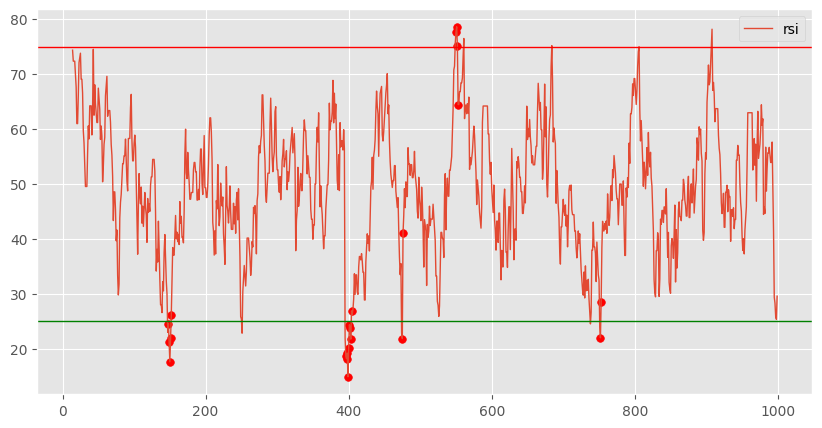

In [12]:
high_bound = 75
low_bound = 25

# subplots for RSI
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# plot RSI
ax.plot(df.loc[:, 'rsi'], linewidth=1)
ax.axhline(y=low_bound, color='g', linestyle='-', linewidth=1)
ax.axhline(y=high_bound, color='r', linestyle='-', linewidth=1)
leg = ax.legend(['rsi'])

# plot signal points
scatter_rsi_points = list()
rsi_sig = SignalFactory().factory('RSI', configs)

for index, row in df.iterrows():
    if index > 2:
        if rsi_sig.higher_bound(df['rsi'], index, high_bound) or rsi_sig.lower_bound(df['rsi'], index, low_bound):
            scatter_rsi_points.append((index, df.loc[index, 'rsi']))

for point in scatter_rsi_points:
    ax.scatter(point[0], point[1], s=30, color='red')
    
plt.show()

# Test up_direction and down_direction methods for STOCH indicator

This methods return True if indicator values increase/decrease.

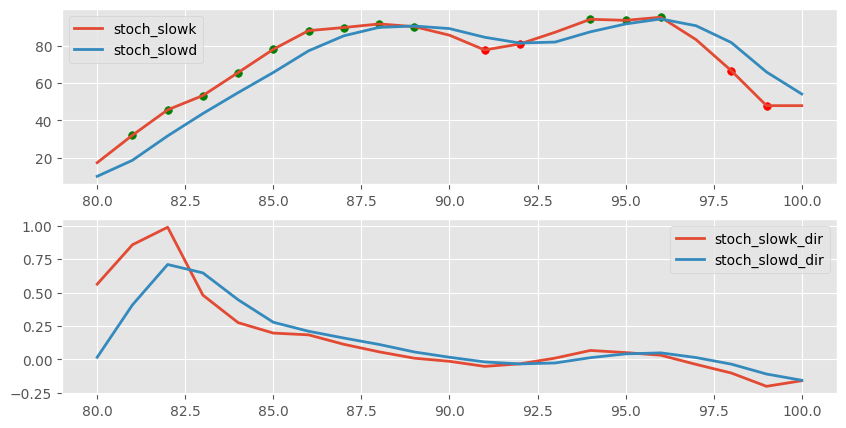

In [13]:
# subplots for STOCH
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2, sharex=ax1)

# plot STOCH
ax1.plot(df.loc[80:100, 'stoch_slowk'], linewidth=2)
ax1.plot(df.loc[80:100, 'stoch_slowd'], linewidth=2)
ax2.plot(df.loc[80:100, 'stoch_slowk_dir'], linewidth=2)
ax2.plot(df.loc[80:100, 'stoch_slowd_dir'], linewidth=2)
leg = ax1.legend(['stoch_slowk', 'stoch_slowd'])
leg = ax2.legend(['stoch_slowk_dir', 'stoch_slowd_dir'])

# plot signal points
scatter_stoch_points_up = list()
scatter_stoch_points_down = list()
stoch_sig = SignalFactory().factory('STOCH', configs)

for index, row in df.iterrows():
    if 80 < index < 100:
        if (stoch_sig.up_direction(df['stoch_slowk_dir'], index) and \
            stoch_sig.up_direction(df['stoch_slowd_dir'], index)):
            scatter_stoch_points_up.append((index, df.loc[index, 'stoch_slowk']))
        if (stoch_sig.down_direction(df['stoch_slowk_dir'], index) and \
            stoch_sig.down_direction(df['stoch_slowd_dir'], index)):
            scatter_stoch_points_down.append((index, df.loc[index, 'stoch_slowk']))

for point in scatter_stoch_points_up:
    ax1.scatter(point[0], point[1], s=30, color='green')

for point in scatter_stoch_points_down:
    ax1.scatter(point[0], point[1], s=30, color='red')
    
plt.show()

# Test crossed_lines method for STOCH indicator

This methods return True if two lines of indicator has crossed (for previous or pre-previous values).

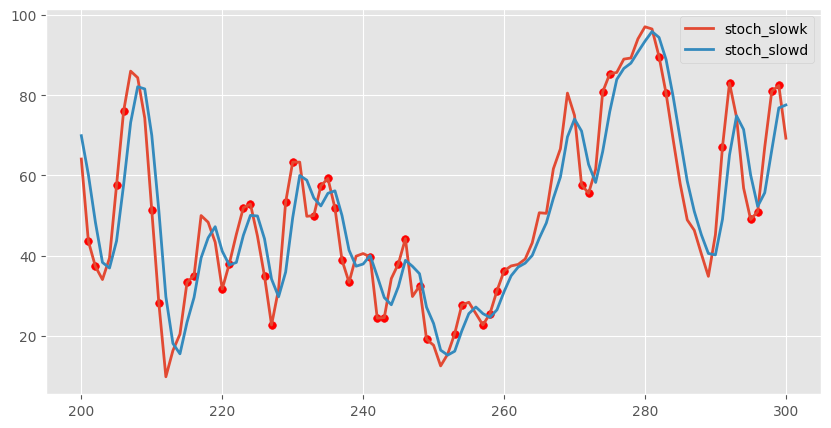

In [14]:
# subplots for RSI
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# plot STOCH
ax.plot(df.loc[200:300, 'stoch_slowk'], linewidth=2)
ax.plot(df.loc[200:300, 'stoch_slowd'], linewidth=2)
leg = ax.legend(['stoch_slowk', 'stoch_slowd'])

# plot signal points
scatter_stoch_points = list()
stoch_sig = SignalFactory().factory('STOCH', configs)

for index, row in df.iterrows():
    if 200 < index < 300:
        if stoch_sig.crossed_lines(df['stoch_diff'], index, True) or \
           stoch_sig.crossed_lines(df['stoch_diff'], index, False):
            scatter_stoch_points.append((index, df.loc[index, 'stoch_slowk']))

for point in scatter_stoch_points:
    ax.scatter(point[0], point[1], s=30, color='red')
    
plt.show()

# Test find_stoch_signal method for STOCH indicator

This methods return True if STOCH indicator is in overbuy/oversell zone, slowk and slowd lines has crossed and both changed their direction.

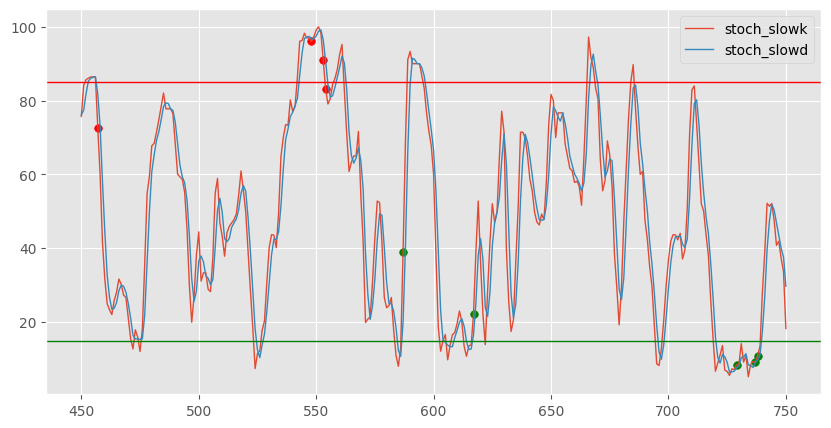

In [15]:
# subplots for RSI
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# plot STOCH
high_bound = 85
low_bound = 15
ax.plot(df.loc[450:750, 'stoch_slowk'], linewidth=1)
ax.plot(df.loc[450:750, 'stoch_slowd'], linewidth=1)
ax.axhline(y=low_bound, color='g', linestyle='-', linewidth=1)
ax.axhline(y=high_bound, color='r', linestyle='-', linewidth=1)
leg = ax.legend(['stoch_slowk', 'stoch_slowd'])

# plot signal points
scatter_stoch_points_buy = list()
scatter_stoch_points_sell = list()
stoch_sig = SignalFactory().factory('STOCH', configs)

for index, row in df.iterrows():
    if 450 < index < 750:
        fs = stoch_sig.find_signal(df, index)
        if fs[0]:
            if fs[1] == 'buy':
                scatter_stoch_points_buy.append((index, df.loc[index, 'stoch_slowk']))
            else:
                scatter_stoch_points_sell.append((index, df.loc[index, 'stoch_slowk']))

for point in scatter_stoch_points_buy:
    ax.scatter(point[0], point[1], s=30, color='green')
    
for point in scatter_stoch_points_sell:
    ax.scatter(point[0], point[1], s=30, color='red')
    
plt.show()

# Test check_levels method for SUP_RES indicator

This methods return True if price is near support level for the buy trade and near resistance level for the sell trade.

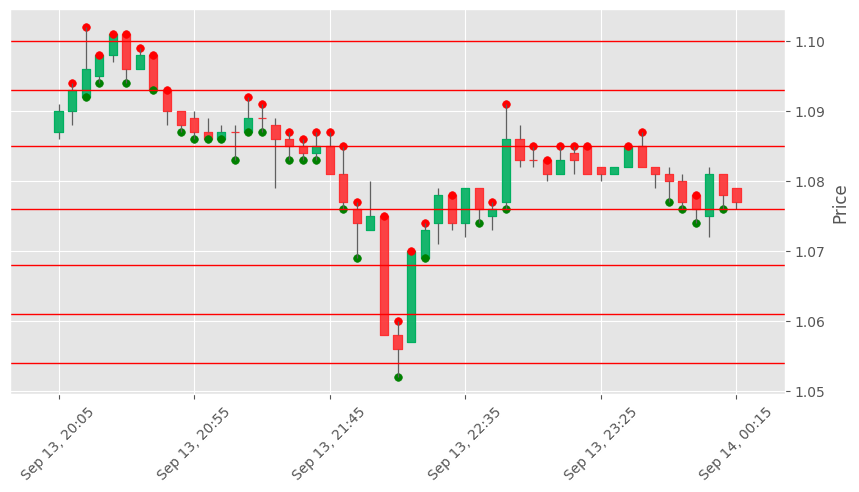

In [16]:
low_bound = 450
high_bound = 500

sup_res_sig = SignalFactory().factory('SUP_RES', configs)
levels = dfs['CRVUSDT']['5m']['levels']
level_proximity = np.mean(df['high'] - df['low']) * sup_res_sig.proximity_multiplier

# subplots for RSI
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# plot candles
ohlc = df.loc[low_bound:high_bound, ['time', 'open', 'high', 'low', 'close', 'volume']]
ohlc = ohlc.set_index('time')
mpf.plot(ohlc, type='candle', ax=ax, warn_too_much_data=10000, style='yahoo')

# plot signal points
scatter_candle_points_buy = list()
scatter_candle_points_sell = list()

# get signal points
for index, row in df.iterrows():
    for buy in [False, True]:
        if low_bound < index < high_bound:
            fs = sup_res_sig.check_levels(df, index, levels, level_proximity, buy)
            if fs:
                if buy:
                    scatter_candle_points_buy.append((index, df.loc[index, 'low']))
                else:
                    scatter_candle_points_sell.append((index, df.loc[index, 'high']))

for point in scatter_candle_points_buy:
    ax.scatter(point[0]-low_bound, point[1], s=30, color='green')
    
for point in scatter_candle_points_sell:
    ax.scatter(point[0]-low_bound, point[1], s=30, color='red')
    
# plot levels
for level in levels:
    if df.loc[low_bound:high_bound, 'low'].min() <= level[0] <= df.loc[low_bound:high_bound, 'high'].max():
        ax.axhline(y=level[0], color='r', linestyle='-', linewidth=1)
        
plt.show()

# Test find_lr method for LR indicator

This methods return True if price is near support level for the buy trade and near resistance level for the sell trade.

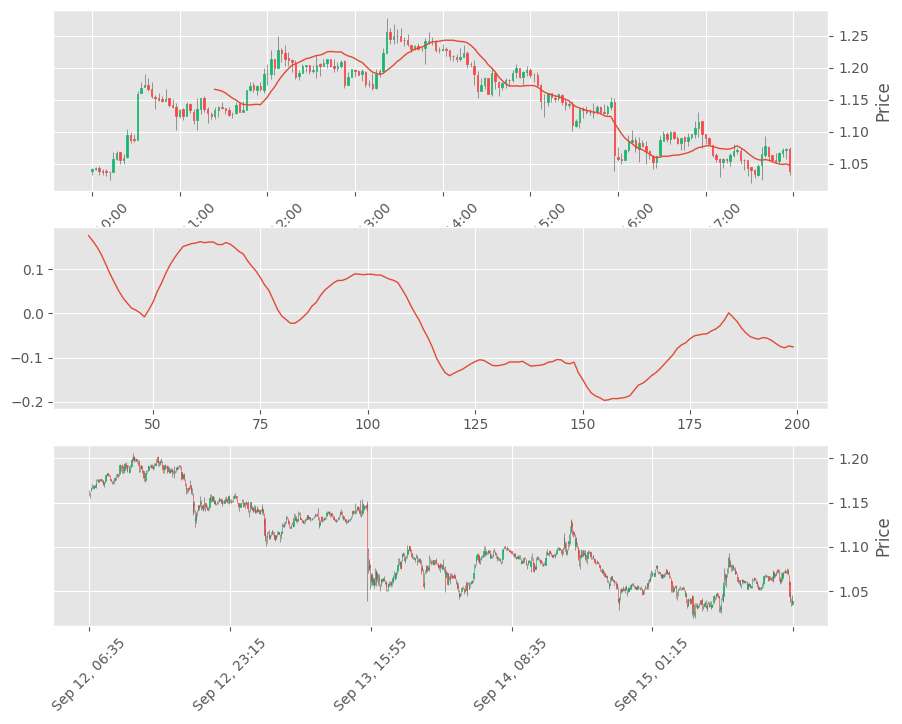

In [17]:
from talib import LINEARREG, LINEARREG_ANGLE, LINEARREG_SLOPE

low_bound = 800
high_bound = 1000
timeperiod = 36

sup_res_sig = SignalFactory().factory('SUP_RES', configs)
dfm = dfs['CRVUSDT']['5m']['data']
dfh = dfs['CRVUSDT']['1h']['data']

# subplots for RSI
fig, axs = plt.subplots(3, 1, figsize=(10, 8))

# plot candles
ohlch = dfh.loc[low_bound:high_bound, ['time', 'open', 'high', 'low', 'close', 'volume']]
ohlch = ohlch.set_index('time')
mpf.plot(ohlch, type='candle', ax=axs[0], warn_too_much_data=10000, style='yahoo')

lr = LINEARREG(ohlch['close'], timeperiod).reset_index(drop=True)
lr_angle = LINEARREG_ANGLE(ohlch['close'], timeperiod).reset_index(drop=True)

axs[0].plot(lr, linewidth=1)
axs[1].plot(lr_angle, linewidth=1)

ohlcm = dfm.loc[:, ['time', 'open', 'high', 'low', 'close', 'volume']]
ohlcm = ohlcm.set_index('time')
mpf.plot(ohlcm, type='candle', ax=axs[2], warn_too_much_data=10000, style='yahoo')
        
# plt.show()

# Test find_signal method of FindSignal class 

Parameters: (BTCUSDT, 5m, pattern: (STOCH, RSI))

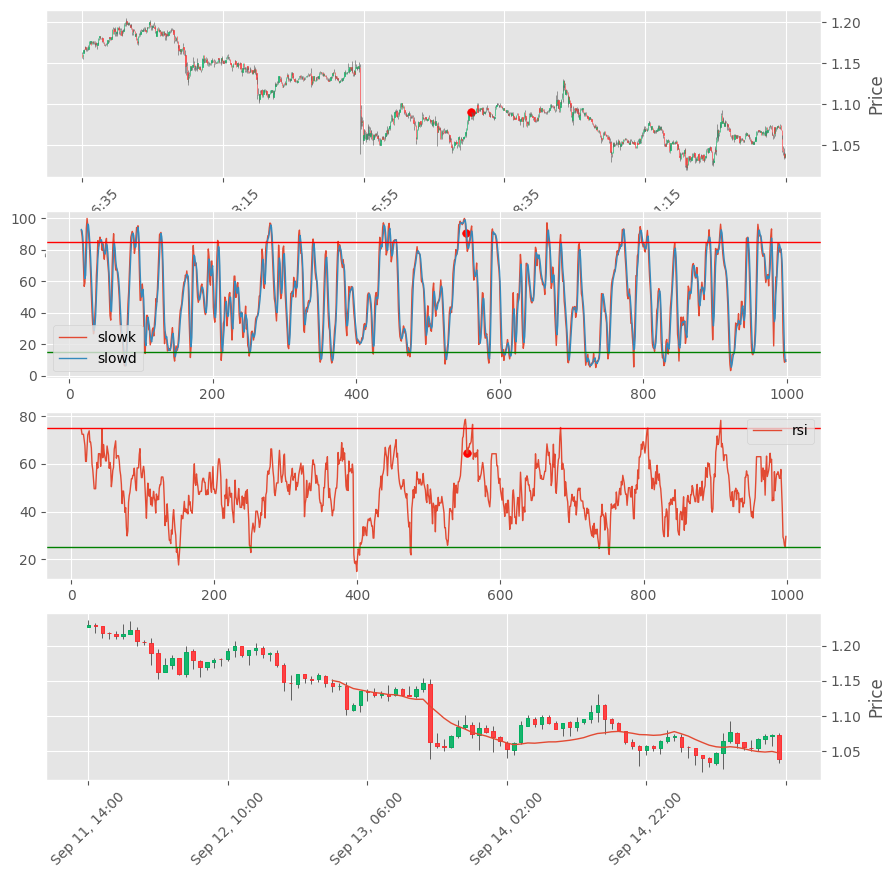

In [18]:
import mplfinance as mpf

low_bound = 0
high_bound = 1000

pd.set_option('display.max_rows', 500)

# find signal points
fs = FindSignal(configs)
fs.patterns = [['STOCH', 'RSI']]
dfm = dfs['CRVUSDT']['5m']['data']
dfh = dfs['CRVUSDT']['1h']['data']
levels = dfs['CRVUSDT']['5m']['levels']
data_qty = 1000
points = fs.find_signal(dfs, 'CRVUSDT', '5m', data_qty)

# subplots for STOCH and RSI
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 10))

# plot candles
ohlc = dfm.loc[low_bound:high_bound, ['time', 'open', 'high', 'low', 'close', 'volume']]
ohlc = ohlc.set_index('time')
mpf.plot(ohlc, type='candle', ax=ax1, warn_too_much_data=10000, style='yahoo')

# plot STOCH
ax2.plot(dfm.loc[low_bound:high_bound, 'stoch_slowk'], linewidth=1)
ax2.plot(dfm.loc[low_bound:high_bound, 'stoch_slowd'], linewidth=1)
# show boundaries
ax2.axhline(y=15, color='g', linestyle='-', linewidth=1)
ax2.axhline(y=85, color='r', linestyle='-', linewidth=1)
leg = ax2.legend(['slowk', 'slowd'])

# plot RSI
ax3.plot(dfm.loc[low_bound:high_bound, 'rsi'], linewidth=1)
# show boundaries
ax3.axhline(y=25, color='g', linestyle='-', linewidth=1)
ax3.axhline(y=75, color='r', linestyle='-', linewidth=1)
leg = ax3.legend(['rsi'])

        
# plot higher timeframe candles + trend
ohlch = dfh.loc[900:, ['time', 'open', 'high', 'low', 'close', 'volume']]
ohlch = ohlch.set_index('time')
mpf.plot(ohlch, type='candle', ax=ax4, warn_too_much_data=10000, style='yahoo')

lr = LINEARREG(ohlch['close'], timeperiod).reset_index(drop=True)
lr_angle = LINEARREG_ANGLE(ohlch['close'], timeperiod).reset_index(drop=True)
ax4.plot(lr, linewidth=1)

# plot signal points
scatter_candle_points_buy = list()
scatter_candle_points_sell = list()
scatter_stoch_points = list()
scatter_rsi_points = list()

for point in points:
    if point[1] == 'buy':
        scatter_candle_points_buy.append((point[2], dfm.loc[point[2], 'low']))
    else:
        scatter_candle_points_sell.append((point[2], dfm.loc[point[2], 'high']))
    scatter_stoch_points.append((point[2], dfm.loc[point[2], 'stoch_slowk']))
    scatter_rsi_points.append((point[2], dfm.loc[point[2], 'rsi']))


for point in scatter_candle_points_buy:
    if low_bound < point[0] < high_bound:
        ax1.scatter(point[0]-low_bound, point[1], s=30, color='green')
        
for point in scatter_candle_points_sell:
    if low_bound < point[0] < high_bound:
        ax1.scatter(point[0]-low_bound, point[1], s=30, color='red')
        
for point in scatter_stoch_points:
    if low_bound < point[0] < high_bound:
        ax2.scatter(point[0], point[1], s=30, color='red')
        
for point in scatter_rsi_points:
    if low_bound < point[0] < high_bound:
        ax3.scatter(point[0], point[1], s=30, color='red')

        
plt.show()

# Test find_signal method of FindSignal class 

Parameters: (BTCUSDT, 5m, pattern: (STOCH, RSI, SUP_RES))

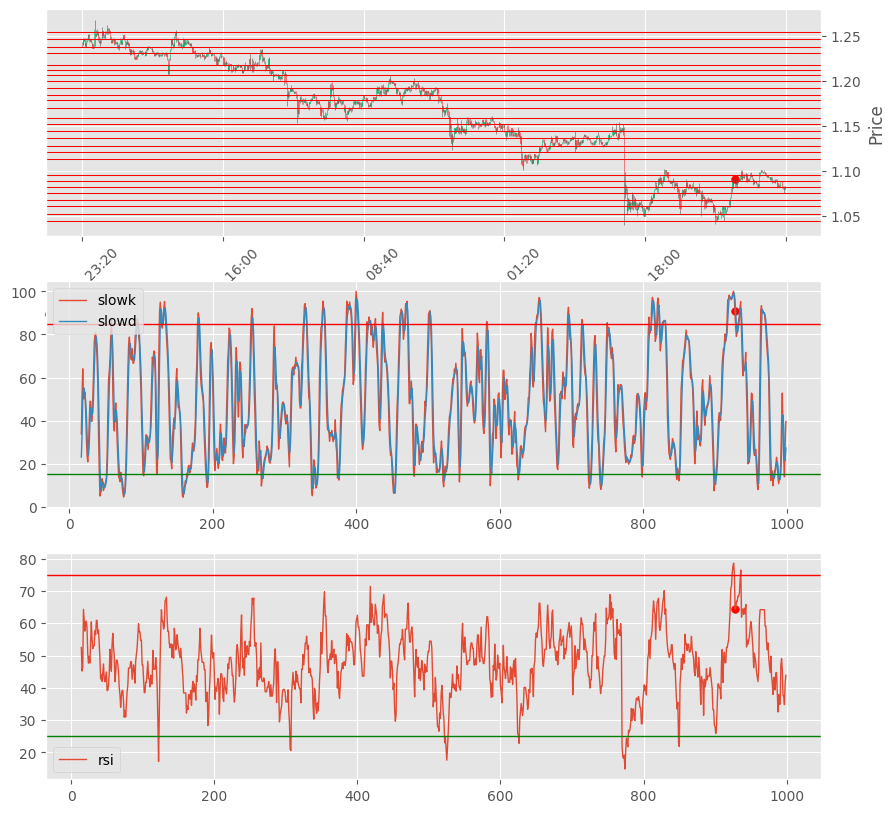

In [10]:
import mplfinance as mpf

low_bound = 0
high_bound = 1000

pd.set_option('display.max_rows', 500)

# find signal points
fs = FindSignal(configs)
fs.patterns = [['STOCH', 'RSI', 'SUP_RES']]
df = dfs['CRVUSDT']['5m']['data']
levels = dfs['CRVUSDT']['5m']['levels']
data_qty = 1000
points = fs.find_signal(df, 'CRVUSDT', '5m', levels, data_qty)

# subplots for STOCH and RSI
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

# plot candles
ohlc = df.loc[low_bound:high_bound, ['time', 'open', 'high', 'low', 'close', 'volume']]
ohlc = ohlc.set_index('time')
mpf.plot(ohlc, type='candle', ax=ax1, warn_too_much_data=10000, style='yahoo')

# plot STOCH
ax2.plot(df.loc[low_bound:high_bound, 'stoch_slowk'], linewidth=1)
ax2.plot(df.loc[low_bound:high_bound, 'stoch_slowd'], linewidth=1)
# show boundaries
ax2.axhline(y=15, color='g', linestyle='-', linewidth=1)
ax2.axhline(y=85, color='r', linestyle='-', linewidth=1)
leg = ax2.legend(['slowk', 'slowd'])

# plot RSI
ax3.plot(df.loc[low_bound:high_bound, 'rsi'], linewidth=1)
# show boundaries
ax3.axhline(y=25, color='g', linestyle='-', linewidth=1)
ax3.axhline(y=75, color='r', linestyle='-', linewidth=1)
leg = ax3.legend(['rsi'])

# plot signal points
scatter_candle_points_buy = list()
scatter_candle_points_sell = list()
scatter_stoch_points = list()
scatter_rsi_points = list()

for point in points:
    if point[3] == 'buy':
        scatter_candle_points_buy.append((point[2], df.loc[point[2], 'low']))
    else:
        scatter_candle_points_sell.append((point[2], df.loc[point[2], 'high']))
    scatter_stoch_points.append((point[2], df.loc[point[2], 'stoch_slowk']))
    scatter_rsi_points.append((point[2], df.loc[point[2], 'rsi']))


for point in scatter_candle_points_buy:
    if low_bound < point[0] < high_bound:
        ax1.scatter(point[0]-low_bound, point[1], s=30, color='green')
        
for point in scatter_candle_points_sell:
    if low_bound < point[0] < high_bound:
        ax1.scatter(point[0]-low_bound, point[1], s=30, color='red')
        
for point in scatter_stoch_points:
    if low_bound < point[0] < high_bound:
        ax2.scatter(point[0]-low_bound, point[1], s=30, color='red')
        
for point in scatter_rsi_points:
    if low_bound < point[0] < high_bound:
        ax3.scatter(point[0]-low_bound, point[1], s=30, color='red')

# plot levels
for level in levels:
    if df.loc[low_bound:high_bound, 'low'].min() <= level[0] <= df.loc[low_bound:high_bound, 'high'].max():
        ax1.axhline(y=level[0], color='r', linestyle='-', linewidth=0.75)
        
plt.show()